In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

%config InlineBackend.figure_format = 'retina'

In [248]:
import os
import time
import matplotlib.pyplot as pl
import numpy as np
import itertools as it
import healpy as hp
from scipy import ndimage as nd
from scipy import stats
import scipy

import core as cr

In [249]:
NSIDE = 2048
NPIX = hp.nside2npix(NSIDE)
LMAX = NSIDE

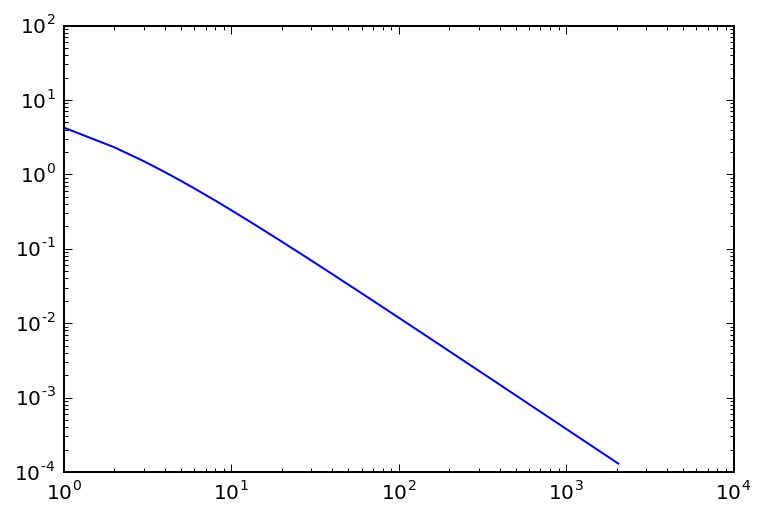

In [231]:
power = (lambda k: 12 / (k + 1) ** 1.5)
cl_in = power(np.arange(LMAX))
ls = np.arange(cl_in.shape[0])
pl.loglog(cl_in)

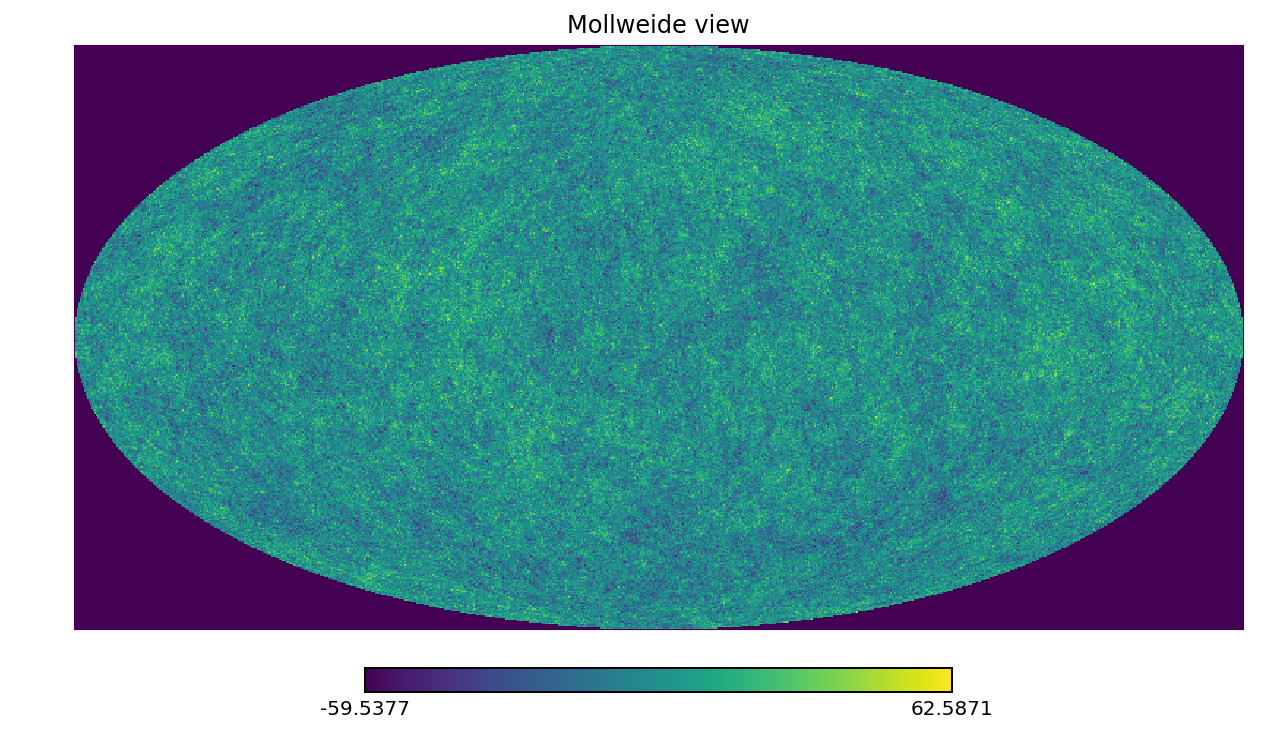

In [232]:
random_field = hp.synfast(cl_in, NSIDE, verbose=False)

# simulate 0.5 deg beam
# random_field = hp.smoothing(random_field, fwhm=np.deg2rad(BEAMSIZE))
hp.mollview(random_field, cmap='viridis')

In [233]:
cl_conv = hp.sphtfunc.anafast(random_field, lmax=LMAX-1)

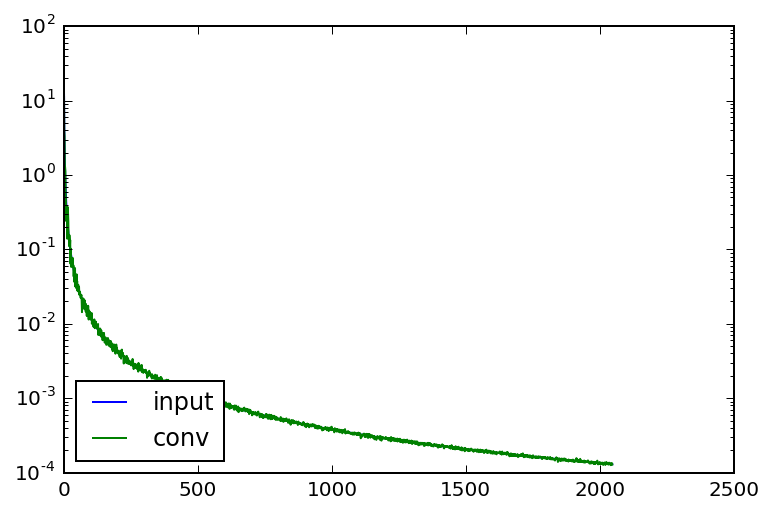

In [234]:
pl.plot(ls, cl_in, label='input')
pl.plot(ls, cl_conv, label='conv')
pl.legend(loc='lower left')
pl.yscale('log')

In [288]:
P_bl, bin_centres = cr.make_P_bl(ls, cl_conv, 50)

In [290]:
cl_bin = np.dot(P_bl, cl_conv)

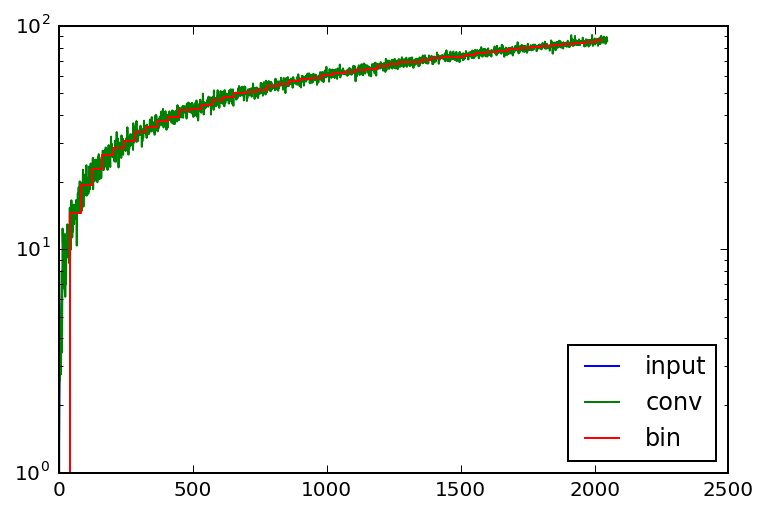

In [291]:
pl.plot(ls, ls * (ls+1)/2./np.pi * cl_in, label='input')
pl.plot(ls, ls * (ls+1)/2./np.pi * cl_conv, label='conv')
pl.plot(bin_centres, cl_bin, label='bin', drawstyle='steps-mid')
pl.legend(loc='best')
pl.yscale('log')